<h3> Sergio Andres Rios Gomez</h3>
<h4> EDA</h4>
<h4> Regresión lineal en Sklearn </h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from scipy import stats

In [2]:
ruta_archivo = '../data/raw/Ecommerce Customers-1.csv'
df = pd.read_csv(ruta_archivo)

<li>Avg. Session Length:  Duración promedio de la sesión</li>
<li>Time on App:  Tiempo en la aplicación</li>
<li>Time on Website: Tiempo en el sitio web </li>
<li>Length of Membership: Duración de la membresía </li>
<li>Yearly Amount Spent: Monto anual gastado</li>

<h4> Exploración inicial: </h4>

In [3]:
# Forma del DataFrame:
df.shape

(500, 8)

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


<p> Información general del DataFrame: </p>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


<p> Estadísticas descriptivas: </p>

In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<p> Identificación de datos faltantes.</p>

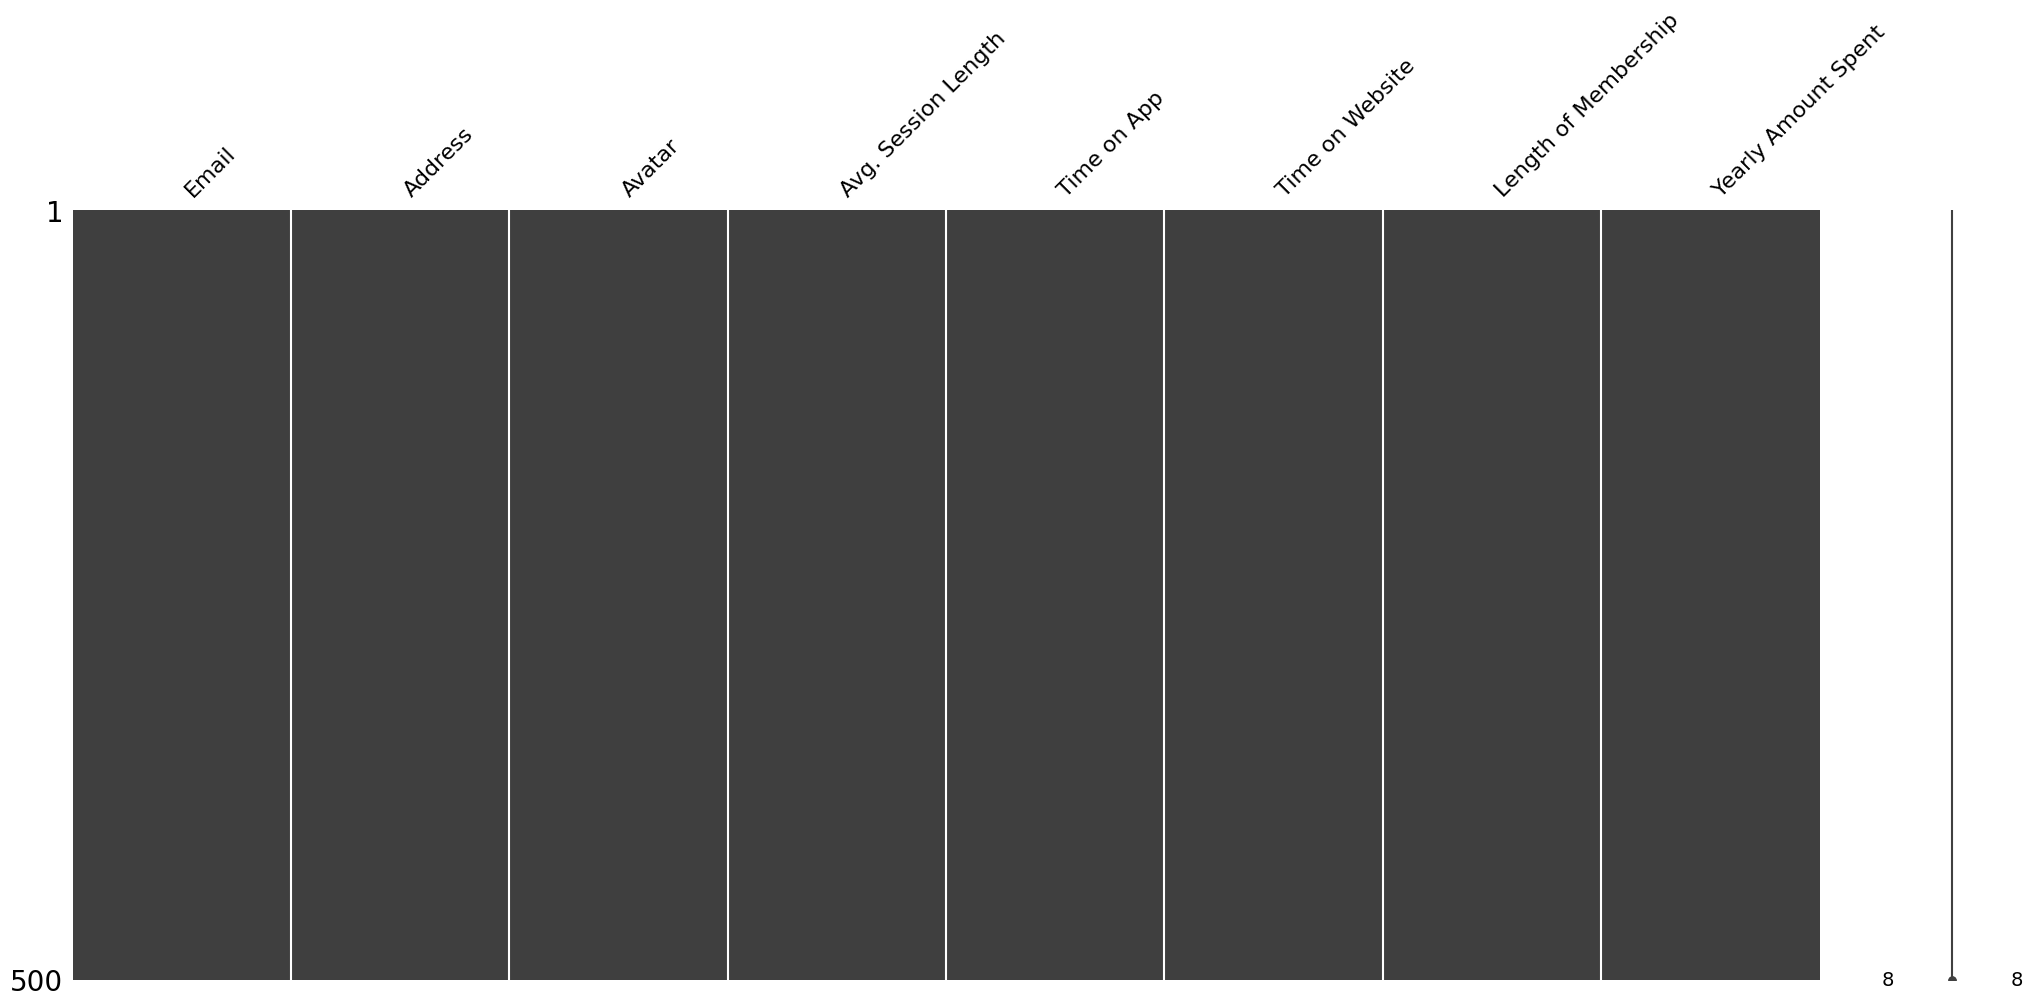

In [7]:
msno.matrix(df)
plt.show()

<p>  Análisis de variables numéricas.</p>

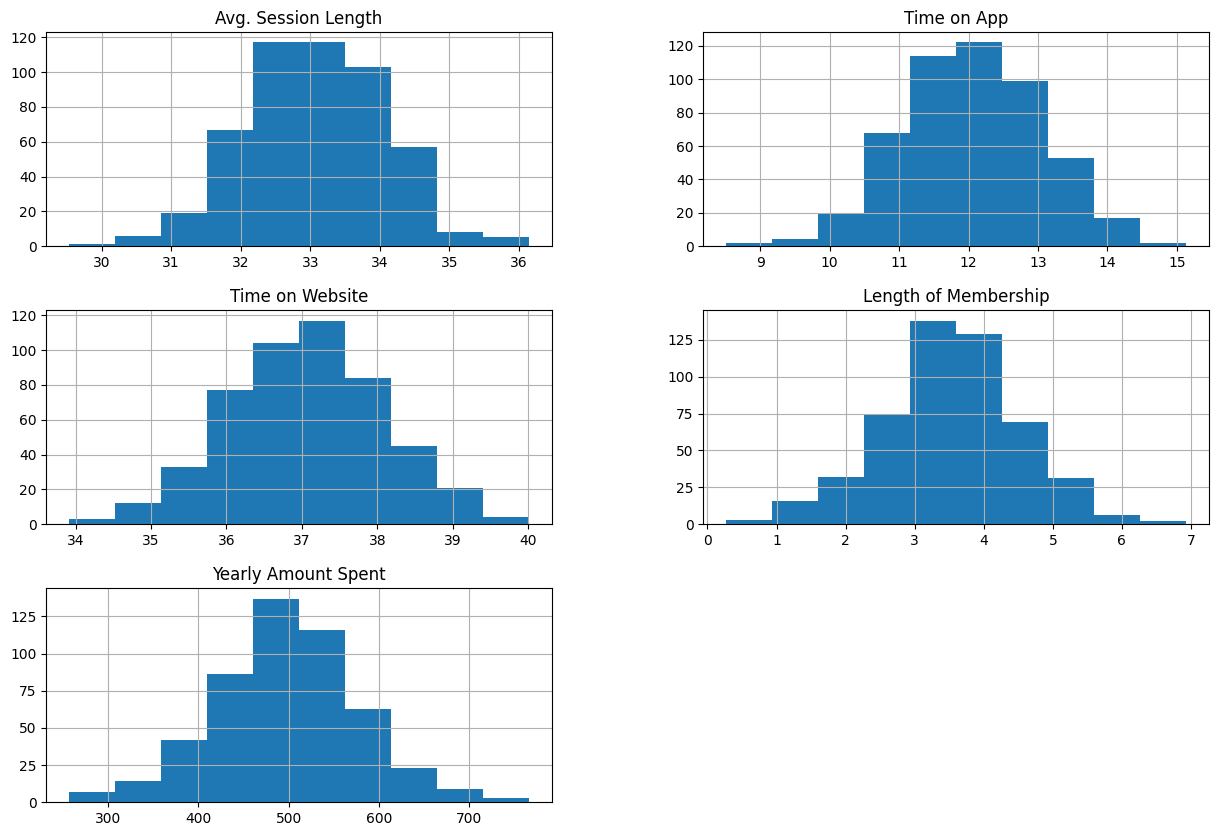

In [8]:
# Histogramas
variables_numericas = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']
df[variables_numericas].hist(figsize=(15, 10))
plt.show()

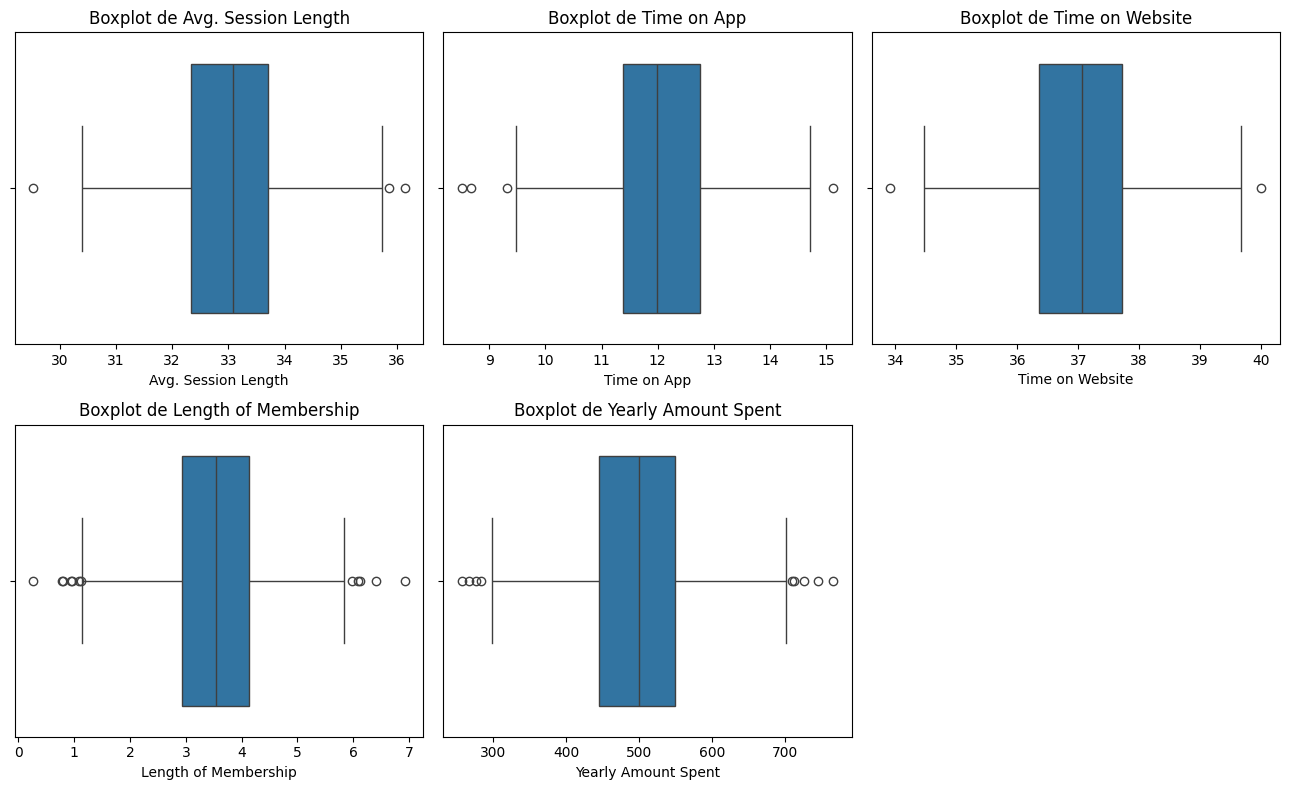

In [9]:
plt.figure(figsize=(13, 8))

for i, columna in enumerate(variables_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()

<p> Análisis de correlaciones: </p>

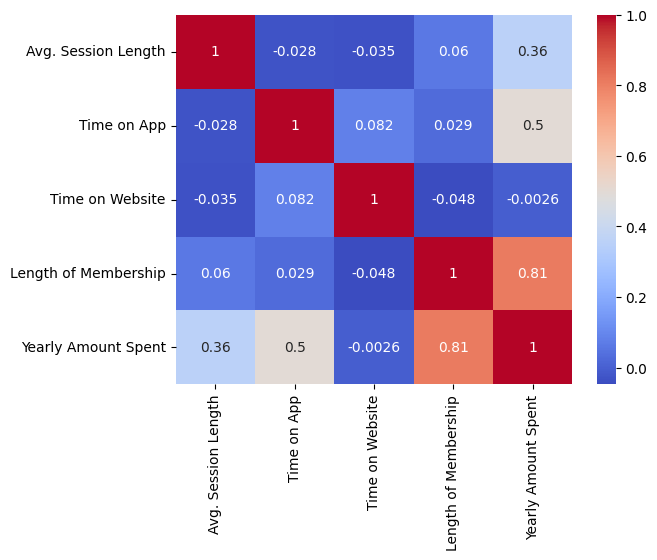

In [10]:
matriz_correlacion = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']].corr()
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.show()

<h4> Conclusiones EDA</h4>
<li> El dataset analizado NO tiene valores nulos o faltantes.</li>
<li> El df cuenta con 500 registros y 8 columnas</li>
<li> Avg. Session Length: La mayoría de las sesiones tienen una duración entre 31 y 35 minutos. </li>
<li> Time on App: Los usuarios pasan generalmente entre 10 y 14 minutos en la aplicación.</li>
<li> Time on Website: El tiempo que los usuarios pasan en el sitio web varía entre 35 y 39 minutos</li>
<li> Length of Membership: La distribución es ligeramente sesgada a la derecha, pero aún se asemeja a una       distribución normal. La duración de la membresía varía entre 1 y 6 años, con una concentración alrededor de 3-4 años.</li>
<li> Yearly Amount Spent: El gasto anual varía entre 300 y 700 dólares, con una concentración alrededor de 400-600 dólares.</li>
<li> Variables independientes: 'Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership' </li>
<li> Variable dependiente: 'Yearly Amount Spent'</li>
<h4> Conclusiones específicas por pares de variables: </h4>
<li> Length of Membership y Yearly Amount Spent: 0.81. A medida que aumenta la duración de la membresía, el gasto anual también tiende a aumentar significativamente.</li>
<li> Time on Website y Yearly Amount Spent: -0.0026. No hay una relación lineal significativa entre el tiempo que los usuarios pasan en el sitio web y el gasto anual.</li>
<li> Length of Membership como predictor clave: La duración de la membresía es un fuerte predictor del gasto anual y debe incluirse en el modelo de regresión lineal.</li>
<li> Time on App como predictor relevante: El tiempo que los usuarios pasan en la aplicación también es un predictor relevante del gasto anual.</li>